## ANALISIS DE REGRESION SIMPLE

###  Librerías a utilizar

In [ ]:
## Tratamiento de datos
import numpy as np
import pandas as pd

## Preprocesado y modelado
from sklearn import datasets, linear_model
import seaborn as sns
from sklearn.model_selection import train_test_split

## Gráficos
import matplotlib.pyplot as plt

### Base de datos

In [ ]:
path_file = r'C:/UPC/'

In [ ]:
df = pd.read_csv(path_file + 'Tv_Sales.csv', delimiter= ',')
df.head(5)

,TV,Ventas
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [ ]:
# Estructura de los datos
df.dtypes

TV        float64
Ventas    float64
dtype: object

In [ ]:
# Cantidad de los datos
df.shape

(200, 2)

#### Definiciòn de Variables

Definición de variable independiente

In [ ]:
X = df.iloc[:, 0:1]

Definición de variable dependiente

In [ ]:
Y = df.iloc[:, 1]

In [ ]:
X

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


### Representación Gráfica

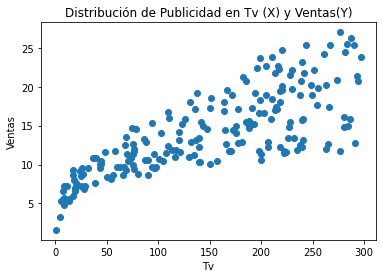

In [ ]:
# Graficamos 
plt.scatter(X,Y)
plt.title('Distribución de Publicidad en Tv (X) y Ventas(Y)')
plt.xlabel('Tv')
plt.ylabel('Ventas')
plt.show()

Se observa que hay una relaciòn lineal entre las variables Tv y Ventas.

### Anàlisis de Correlaciòn

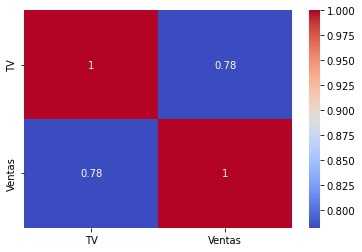

In [ ]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

## Modelado

In [ ]:
# División de los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=1280)

In [ ]:
X_train.shape

(160, 1)

In [ ]:
X_test.shape

(40, 1)

In [ ]:
y_train.shape

(160,)

In [ ]:
y_test.shape

(40,)

#### Modelo de Regresiòn Lineal Simple

In [ ]:
#Definimos el algoritmo a utilizar
lr_simple = linear_model.LinearRegression()

In [ ]:
#Entrenamos el modelo
lr_simple.fit(X_train,y_train)

LinearRegression()

#### Estimadores de los Coeficientes

In [ ]:
print('DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE')
print()
# Pendiente
print("Pendiente: ",lr_simple.coef_)
# Interceptor
print("Interceptor: ",lr_simple.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE

Pendiente:  [0.04611622]
Interceptor:  7.048976837933836


#### Predicciòn del Modelo

In [ ]:
#Realizamos una predicción
Y_pred = lr_simple.predict(X_test)
Y_pred

array([12.39845852, 12.59214665, 16.46129762, 16.76566468, 19.35739633,
       10.51230506, 10.56764453, 20.02608154,  8.14654291, 17.46201963,
       18.19526755,  9.79750363,  9.70065957, 17.12537121, 16.0600865 ,
       15.86178675, 17.1853223 , 17.9969678 , 17.63264965, 20.58869944,
        7.95285478, 20.71782486, 17.75255182, 15.46979886,  7.84217585,
       10.43390749, 19.97074207,  7.45018796, 19.1637082 ,  9.64070848,
       13.56519892, 11.37929003, 15.38678967, 16.26299787, 18.03386077,
       14.58897904, 11.46229923, 18.26444188, 20.55641808, 10.17565665])

In [ ]:
df_pred = pd.DataFrame(X_test)
df_pred = df_pred.assign(Ventas=y_test)
df_pred = df_pred.assign(Pred = Y_pred.flatten().tolist())
df_pred.head(3)

,TV,Ventas,Pred
79,116.0,11.0,12.398459
7,120.2,13.2,12.592147
14,204.1,19.0,16.461298


In [ ]:
df_pred.shape

(40, 3)

C:\Users\nerid\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


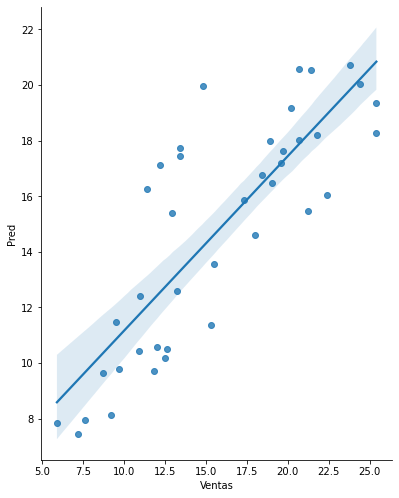

In [ ]:
sns.pairplot(df_pred, x_vars=['Ventas'], y_vars='Pred', size=7, aspect=0.8,kind = 'reg')

Comparando los datos de la predicciòn con los datos reales, se observa que hay diferencia considerable entre si, por lo tanto este modelo no es el màs adecuado implementar para este conjunto de datos.

#### Evaluaciòn del Modelo

In [ ]:
# Precisiòn del Modelo
print("Precisión del Modelo: ",lr_simple.score(X_train,y_train))

Precisión del Modelo:  0.5853828004879083


La precisiòn no es buena, ya que este valor no està cercano a la unidad.

### Conclusiones

Haber tenido estos resultados no quiere decir que el algoritmo sea malo sino que no es el mejor para este conjunto de datos.